In [7]:
import matplotlib.pyplot as plt
# Remove rare and common tokens.
from gensim.corpora import Dictionary
from topic_modelling_function import extract_documents, extract_documents_csv, pre_processing, find_bigrams, training

In [8]:
#docs = list(extract_documents())
docs = extract_documents_csv()
len(docs)

18354

In [9]:
docs = pre_processing(docs)
docs = find_bigrams(docs)

In [10]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 15657
Number of documents: 18354


In [11]:
top_topics = training(corpus, dictionary, num_topics=20)
len(top_topics)

Average topic coherence: -1.5640.


20

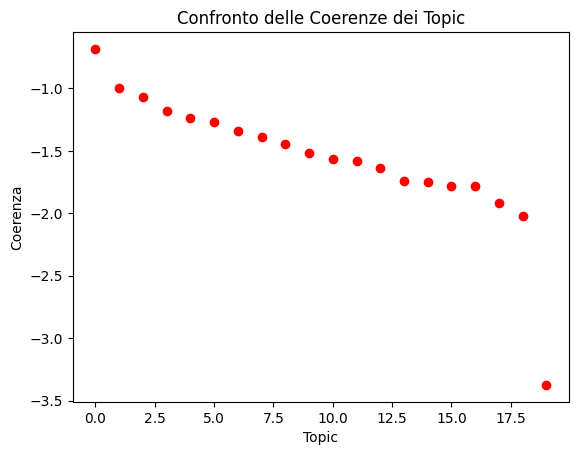

In [12]:
# Creazione del grafico a dispersione
coherence_scores = [topic[1] for topic in top_topics]

# Creazione del grafico a dispersione
plt.scatter(range(len(coherence_scores)), coherence_scores, color='r')
# Aggiunta delle etichette degli assi e del titolo del grafico
plt.xlabel('Topic')
plt.ylabel('Coerenza')
plt.title('Confronto delle Coerenze dei Topic')

# Visualizzazione del grafico
plt.show()
